# Identifying BCG candidates for A401-A399

We must treat these two clusters separately, as the BCG identification framework makes use of publicly accessible DESI Legacy Survey photometry, and Abell 401 & 399 are outside of its coverage.

Of course LoVoCCS' primary data are very deep images taken by DECam on the Blanco 4m telescope, so we can make use of one of our processed images instead. The BCG identification framework is fairly generalised, and it should behave the same (including writing the results to the same history files).

## Import statements and reading history/sample

In [29]:
%matplotlib ipympl

from ident_run_setup import cosmo, side_length, HISTORY_FILE_PATH, load_history, proj_name, update_history, InteractiveView
from interactive_spec_search import SpecSearch

from xga.products import Image

from astropy.wcs import WCS
from astropy.units import Quantity
from astropy.visualization import MinMaxInterval, LogStretch
import matplotlib
from matplotlib import pyplot as plt
# from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

%matplotlib ipympl

Loading the history file:

In [2]:
cur_history = load_history()

## Reading LoVoCCS image and constructing WCS

In [3]:
lov_pth = "raw_images/LoVoCCS-2/lovoccs/noupload_A401-A399_54-87_irg.png"
lov_data = np.flip(plt.imread(lov_pth), axis=0)

lov_wcs = WCS(naxis=2)
# lov_cen = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['cen_pos']
# ls_pix_scale = cur_history['data_operations'][cur_name]['raw_images']['desi-ls']['arcsec_per_pix']

lov_wcs.wcs.cdelt = [-7.3055555555705E-05*5, 7.3055555555701E-05*5]
# lov_wcs.wcs.
lov_wcs.wcs.crpix = [8000/5, 12000/5]
lov_wcs.wcs.crval = [44.745346818032, 13.534785516042]
lov_wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

## General setup

### Controlling how images are displayed

In [ ]:
im_scale = {'xmm': {}}
im_scale['xmm']['interval'] = MinMaxInterval()
im_scale['xmm']['stretch'] = LogStretch()
im_scale['xmm']['cmap'] = 'gnuplot2'

## A401

In [5]:
cur_name = 'LoVoCCS-2'

### Reading XMM image

In [6]:
xm_pth = "raw_images/{n}/xmm/{n}_0.5-2.0keV_comb.fits".format(n=cur_name)
xmm_im = Image(xm_pth, 'combineed', 'combineed', '', '', '', Quantity(0.5, 'keV'), Quantity(2.0, 'keV'))

### Putting data together

In [7]:
im_data = {'lovoccs': lov_data,
           'xmm': xmm_im.data}

im_wcs = {'lovoccs': lov_wcs,
          'xmm': xmm_im.radec_wcs}

### Identification

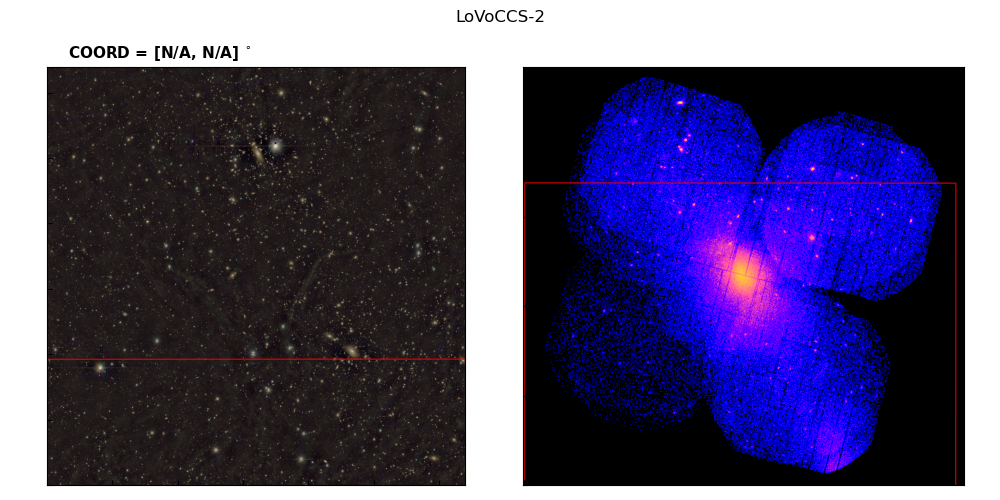

In [9]:
cur_im = InteractiveView(im_data, im_wcs, 'lovoccs', cur_name, im_scale=im_scale, figsize=(10, 5))

**NOTES**:

* Small-ish (relative to A401 BCG) big looking elliptical galaxy at [44.8133, 13.2426]
* 

In [25]:
cur_history = load_history()
cand_coords = [Quantity(cc['lovoccs_pos'], 'deg') for n, cc in cur_history['bcg_identification'][cur_name].items() 
               if 'BCG' in n]
print(cand_coords)
# Here there is something wrong, and we cannot continue
# if len(cand_coords) == 0:
#     rel_entry = cur_history['bcg_spec_identification'][cur_name]
#     rel_entry['ident_complete'] = True
#     cur_history['bcg_spec_identification'][cur_name] = rel_entry
#     update_history(cur_history)

#     raise ValueError("There are not BCG candidate coordinates for {n}, we cannot continue - marking "
#                      "spectrum identification as complete.".format(n=cur_name))
    
# cand_coords

[<Quantity [44.74083557, 13.58264646] deg>]


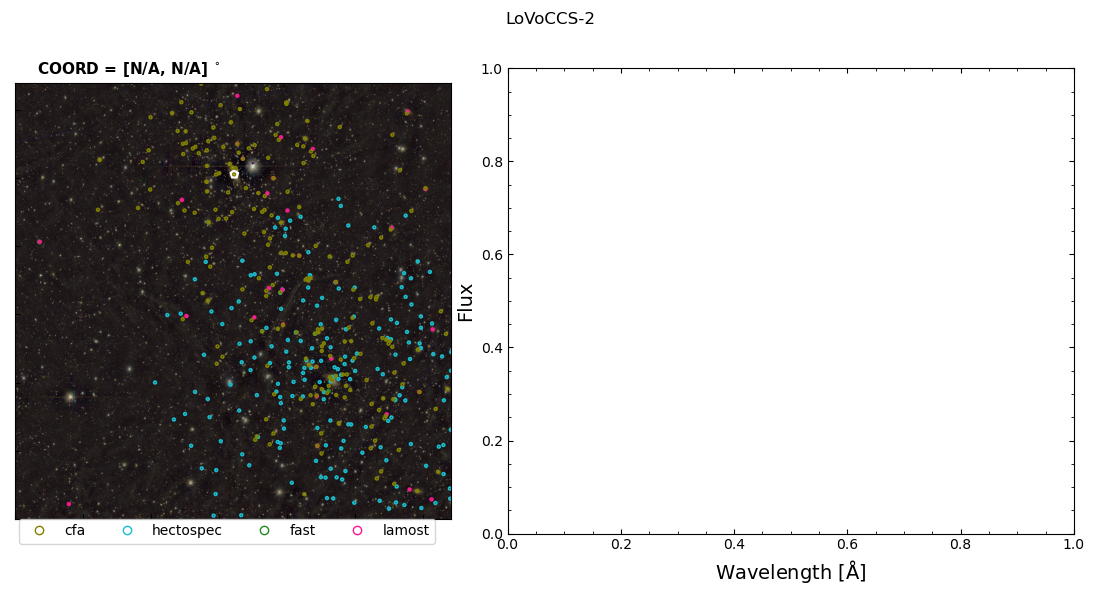

In [31]:
sp_im_data = {'lovoccs': lov_data}
sp_im_wcs = {'lovoccs': lov_wcs}

cur_sp = SpecSearch(sp_im_data, sp_im_wcs, 'lovoccs', cur_name, cand_coords, figsize=(11, 6), im_spec_ratio=[1, 1.3], 
                    default_smooth_spec=5)

## A399

In [10]:
a399_cur_name = 'LoVoCCS-14'

### Reading XMM image

In [14]:
a399_xm_pth = "raw_images/{n}/xmm/{n}_0.5-2.0keV_comb.fits".format(n=a399_cur_name)
a399_xmm_im = Image(a399_xm_pth, 'combineed', 'combineed', '', '', '', Quantity(0.5, 'keV'), Quantity(2.0, 'keV'))

### Putting data together

In [15]:
im_data_a399 = {'lovoccs': lov_data,
                'xmm': a399_xmm_im.data}

im_wcs_a399 = {'lovoccs': lov_wcs,
               'xmm': a399_xmm_im.radec_wcs}

### Identification

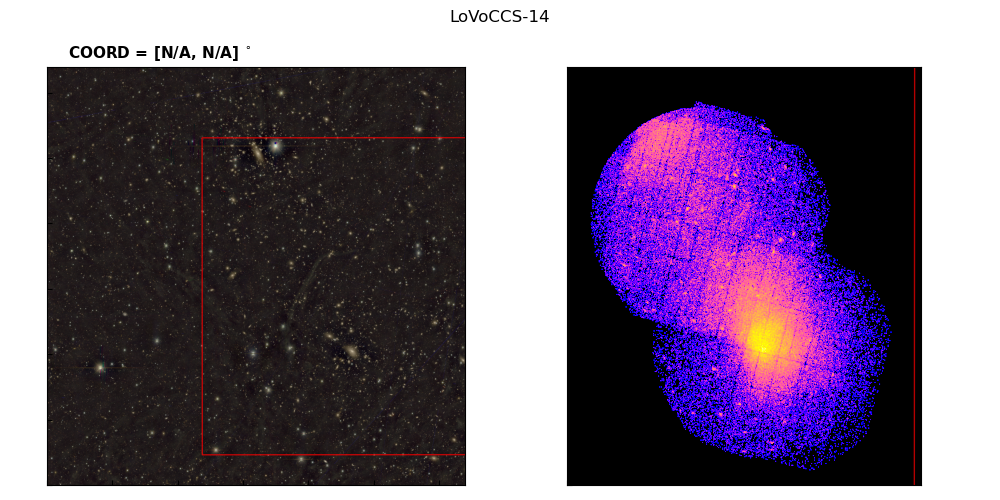

In [26]:
cur_im_a399 = InteractiveView(im_data_a399, im_wcs_a399, 'lovoccs', a399_cur_name, im_scale=im_scale, figsize=(10, 5))

In [28]:
cur_history = load_history()
a399_cand_coords = [Quantity(cc['lovoccs_pos'], 'deg') for n, cc in cur_history['bcg_identification'][a399_cur_name].items() 
                    if 'BCG' in n]
print(a399_cand_coords)
# Here there is something wrong, and we cannot continue
# if len(cand_coords) == 0:
#     rel_entry = cur_history['bcg_spec_identification'][cur_name]
#     rel_entry['ident_complete'] = True
#     cur_history['bcg_spec_identification'][cur_name] = rel_entry
#     update_history(cur_history)

#     raise ValueError("There are not BCG candidate coordinates for {n}, we cannot continue - marking "
#                      "spectrum identification as complete.".format(n=cur_name))
    
# cand_coords

[<Quantity [44.47099843, 13.0310012 ] deg>, <Quantity [44.53583801, 13.07294375] deg>]


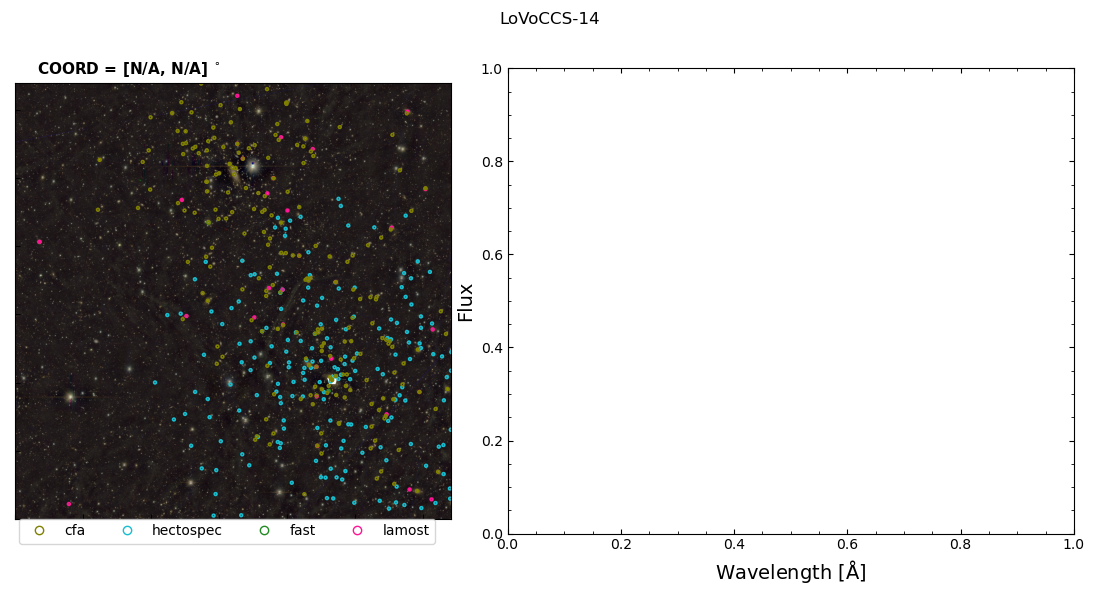

In [33]:
a399_sp_im_data = {'lovoccs': lov_data}
a399_sp_im_wcs = {'lovoccs': lov_wcs}

cur_sp = SpecSearch(a399_sp_im_data, a399_sp_im_wcs, 'lovoccs', a399_cur_name, a399_cand_coords, figsize=(11, 6), 
                    im_spec_ratio=[1, 1.3], default_smooth_spec=5)